# TTT4185 Machine learning for Speech technology

## Computer assigment 3b:  Regression analysis

Regression analysis is used to estimate/measure the relationship between an _independent_ variable, say $x$, and a _dependent_ variable, say $y$. One of the simplest regression problems is 
\begin{equation}
y = ax + b
\end{equation}
where $a$ and $b$ are constants. In practice our observations will be contaminated by noise, so we have
\begin{equation}
y = ax + b + n,
\end{equation}
where $n$ is noise, eg. measurement errors. This particular problem is called _linear regression_.

We will have a look at _non-linear regression_, using deep neural networks. Here we are looking at general regression problems in the form 
\begin{equation}
y = f(x) + n.
\end{equation}

We generate our data according to the function $f(x) = x^2 + \cos(20x) \text{ sign}(x)$, obtaining a set of observations $\{(x_i,y_i)\}$.

Then we assume we do not know the underlying function and we try to recover and approximation of $f$ only using the observations $\{(x_i,y_i)\}$.

In [1]:
import sys

print(sys.executable)

C:\ProgramData\Miniconda3\envs\tf_3.7\python.exe


In [2]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib notebook
# %matplotlib inline

import tensorflow as tf
from tensorflow import keras

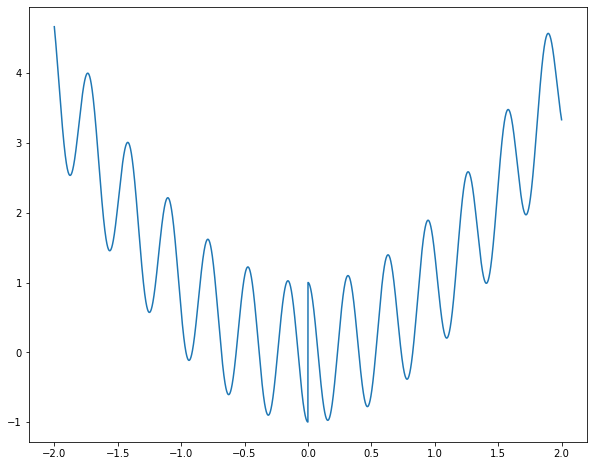

In [3]:
# Define function
def f(x):
    return x**2 + np.cos(20*x)*np.sign(x)

# Setup some simulation parameters
# Number of observations
N = 5000

# Plot a "clean" version of the relationship between x and y
plt.figure(figsize=(10, 8))
x = np.linspace(-2,2,N)
plt.plot(x, f(x))
plt.show()

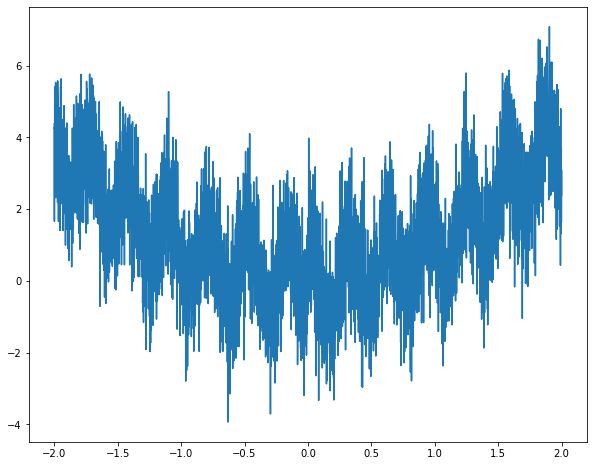

In [4]:
# Create a noise version of the observations
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(10, 8))
plt.plot(x,y)
plt.show()

One way to perform regression is to assume that the data is generated using a set of functions from a cerain family, for example polynomials of order $p$,
\begin{equation}
\hat f(x) = a_0 + a_1 x + a_2 x^2 \ldots a_p x^p.
\end{equation}
Then regression corresponds to fitting the parameters in the model. Let us see how this works out before using our neural networks.

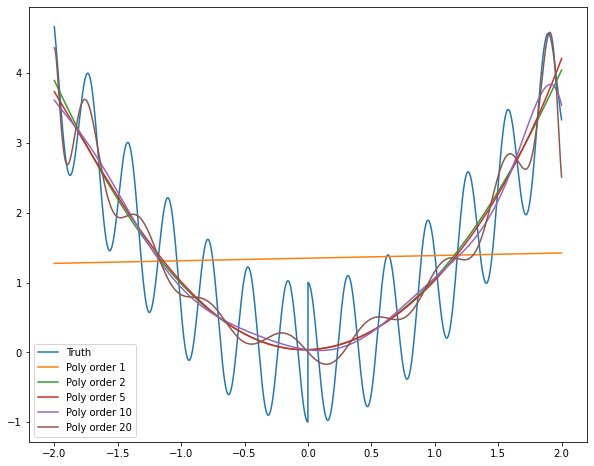

In [5]:
# Give a set of polynomial orders to try
P = [1, 2, 5, 10, 20]

# Define estimator function. Arguments are inout variable, observation and polynomial order
# Returns a set of polynomial coefficients
def reg_estimator(x,y,p):
    # Use simple ls approach
    N = len(x)
    H = np.zeros((N,p+1))
    for col in range(p+1):
        H[:,col] = x**col
    iHtH = np.linalg.inv(np.dot(H.T,H))
    theta = np.dot(np.dot(iHtH,H.T),y)
    return theta

# Computes fx) = c_0 + c_1x + c_2 x^2 ... c_p x^p
def poly(x, C):
    # compute p(x) for coeffs in c
    y = 0*x
    for p, c in enumerate(C):
        y += c*x**p        
    return y

plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
for p in P:
    C = reg_estimator(x,y,p)
    plt.plot(x,poly(x,C),label="Poly order " + str(p))
plt.legend()
plt.show()

## Problem 1
Play with different $p$ to see how close you can get to the true function.

Note: Very high $p$ will give numerical problems.

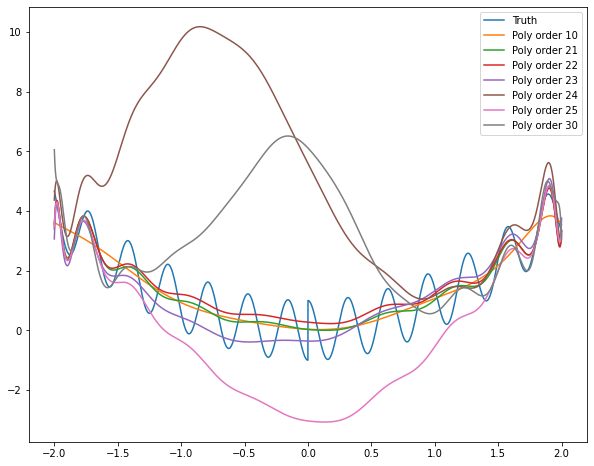

In [6]:
P = [10, 21, 22, 23, 24, 25, 30]

# truth 
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")

# estimate 
for p in P:
    C = reg_estimator(x,y,p)
    plt.plot(x,poly(x,C),label="Poly order " + str(p))
plt.legend()
plt.show()

In what follows we will use a deep neural network to approximate $f$. We set this up below

In [7]:
# Ceate a model with a single hidden layer. Note that input and output has
# dimension one
M = 512
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(1)
])

model.summary()
# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


We train the network by using $x$ as an input and the squared error between the network output $\hat y$ and the observed value $y$ as a loss
\begin{equation}
 L = \frac{1}{N} \sum_n (\hat y - y)^2
\end{equation}

We first try our network on clean data to check if it works.

In [10]:
# train the model
history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

Epoch 1/1000
40/40 [==============================] - 0s 781us/step - loss: 0.8512 - accuracy: 0.0000e+00
Epoch 2/1000
40/40 [==============================] - 0s 818us/step - loss: 0.7155 - accuracy: 0.0000e+00
Epoch 3/1000
40/40 [==============================] - 0s 732us/step - loss: 0.6374 - accuracy: 0.0000e+00
Epoch 4/1000
40/40 [==============================] - 0s 806us/step - loss: 0.5860 - accuracy: 0.0000e+00
Epoch 5/1000
40/40 [==============================] - 0s 905us/step - loss: 0.5544 - accuracy: 0.0000e+00
Epoch 6/1000
40/40 [==============================] - 0s 967us/step - loss: 0.5380 - accuracy: 0.0000e+00
Epoch 7/1000
40/40 [==============================] - 0s 1ms/step - loss: 0.5295 - accuracy: 0.0000e+00
Epoch 8/1000
40/40 [==============================] - 0s 781us/step - loss: 0.5192 - accuracy: 0.0000e+00
Epoch 9/1000
40/40 [==============================] - 0s 719us/step - loss: 0.5140 - accuracy: 0.0000e+00
Epoch 10/1000
40/40 [===========================

Using the variable `history`, plot the evolution of the loss during training. 

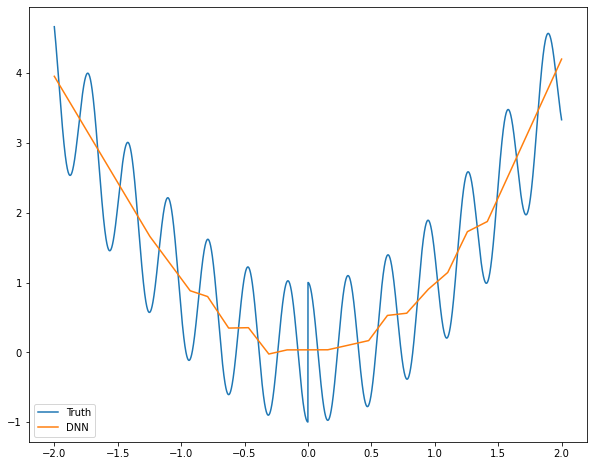

In [11]:
# Compute \hat y from the network and compare this to the true f(x)
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

## Problem 2
Try increasing the number of nodes in the network to see if the results can be improved.

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               1024      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 0s 632us/step - loss: 2.1906 - accuracy: 0.0000e+00
Epoch 2/1000
40/40 [==============================] - 0s 843us/step - loss: 0.9164 - accuracy: 0.0000e+00
Epoch 3/1000
40/40 [==============================] - 0s 707us/step - loss: 0.7493 - accuracy: 0.0000e+00
Epoch 4/1000
40/40 [==============================] - 0s 707us/step - loss: 0.6630 - accuracy: 0.0000e+00
Epoch 5/1000
40/40 [==============================] - 0s 694us/step - loss: 0.6053 - accur

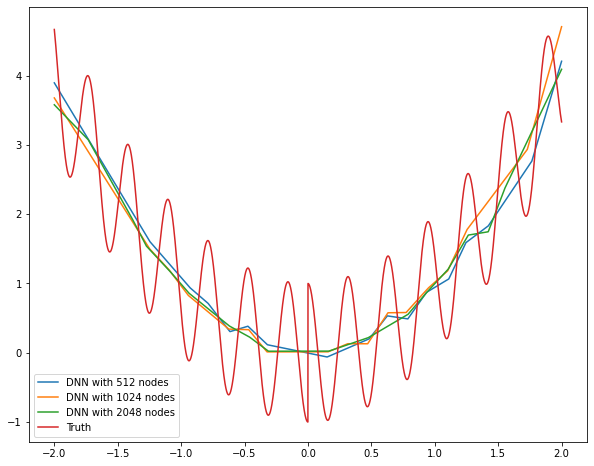

In [15]:
Ms = [512, 1024, 2048]

plt.figure(figsize=(10,8))
for M in Ms:
    # Ceate a model with a single hidden layer. Note that input and output has
    # dimension one
    model = keras.Sequential([
        keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
        keras.layers.Dense(1)
    ])

    model.summary()
    # Train the model
    model.compile(loss='mean_squared_error',
                optimizer="adam",
                metrics=['accuracy'])


    # train the model
    history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

    # Compute \hat y from the network and compare this to the true f(x)
    z = model.predict(x)
    plt.plot(x,z,label="DNN with "+str(M)+" nodes")
    
plt.plot(x,f(x),label="Truth")

plt.legend()
plt.show()

Next we will use a deep network with more than one hidden layer.

## Problem 3


In [16]:
# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 16
model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(x, f(x), epochs=1000, batch_size=128, verbose=True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 0s 657us/step - loss: 3.4375 - accuracy: 0.0000e+00
Epoch 2/1000
40/

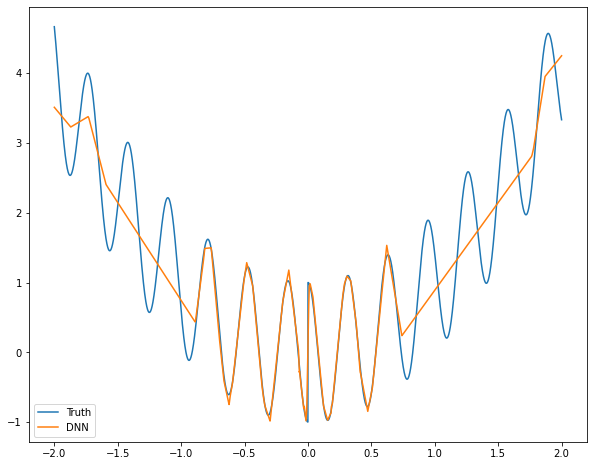

In [17]:
z = model.predict(x)
plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")
plt.plot(x,z,label="DNN")
plt.legend()
plt.show()

Try increasing the number of hidden nodes per layer until performance is satisfactory. Can the same effect be achieved by just adding more layers?

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 32)                64        
_________________________________________________________________
dense_172 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_173 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_174 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_175 (Dense)            (None, 1)                 33        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 0s 4ms/step - loss: 3.4624 - accuracy: 0.0000e+00 - val_loss: 0

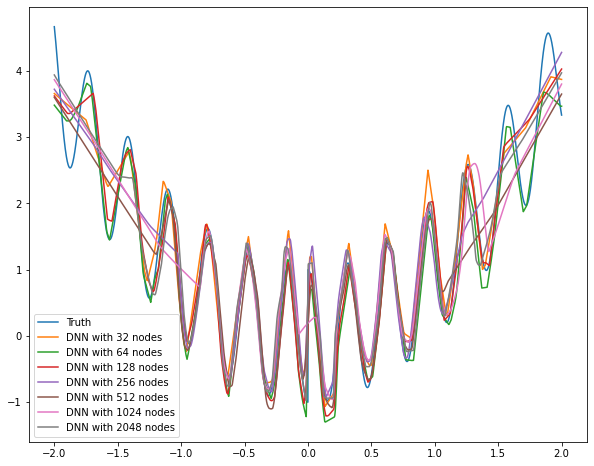

In [38]:

plt.figure(figsize=(10,8))
plt.plot(x,f(x),label="Truth")

for m in range(5, 12):

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

    # Create a model with multiple hidden layers. Note that input and output has
    # dimension one
    M = 2**m
    model = keras.Sequential([
        keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
        keras.layers.Dense(M, activation=tf.nn.relu),
        keras.layers.Dense(M, activation=tf.nn.relu),
        keras.layers.Dense(M, activation=tf.nn.relu),
        keras.layers.Dense(1)
    ])
    model.summary()

    # Train the model
    model.compile(loss='mean_squared_error',
                optimizer="adam",
                metrics=['accuracy'])

    history = model.fit(x, y, epochs=1000, batch_size=128, validation_data=(x, f(x)), callbacks=[callback], verbose=True, use_multiprocessing=True, workers = 4)


    z = model.predict(x)
    plt.plot(x,z,label="DNN with "+str(M)+" nodes")
    


plt.legend()
plt.show()

## Problem 4
Using the best setup from the previous problem, train a model using the noisy data.

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_241 (Dense)            (None, 64)                128       
_________________________________________________________________
dense_242 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_243 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_244 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_245 (Dense)            (None, 1)                 65        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
40/40 [==============================] - 0s 9ms/step - loss: 2.4205 - accuracy: 0.0000e+00 - val_loss:

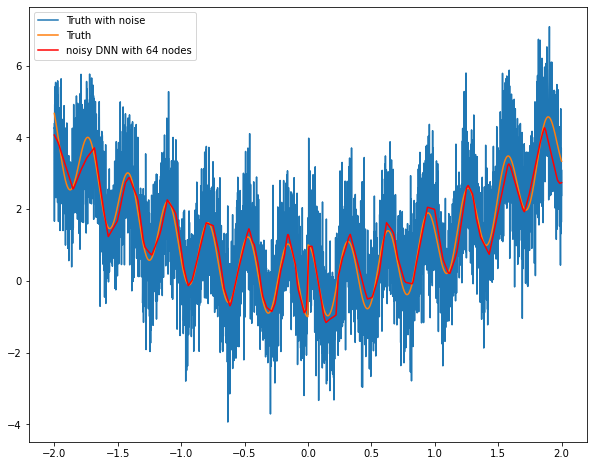

In [46]:

plt.figure(figsize=(10,8))
plt.plot(x, y,label="Truth with noise")
plt.plot(x,f(x),label="Truth")

# Create a model with multiple hidden layers. Note that input and output has
# dimension one
M = 64
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

model = keras.Sequential([
    keras.layers.Dense(M, activation=tf.nn.relu, input_dim=1),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(M, activation=tf.nn.relu),
    keras.layers.Dense(1)
])
model.summary()

# Train the model
model.compile(loss='mean_squared_error',
            optimizer="adam",
            metrics=['accuracy'])


history = model.fit(x, y, epochs=1000, batch_size=128, validation_data=(x, f(x)), callbacks=[callback], verbose=True, use_multiprocessing=True, workers = 4)

z = model.predict(x)

plt.plot(x,z,label="noisy DNN with "+str(M)+" nodes", c='r')

plt.legend()
plt.show()